In [1]:
# Import, Preprocess
import pandas as pd 
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
import gensim.downloader as api


# Base Model Structures
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import GRU

# Model Modifications
from tensorflow.keras.layers import Dropout

# Evaluation
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
print("GPUs Available:", tf.config.list_physical_devices('GPU'))

GPUs Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
np.random.seed(2319)
tf.random.set_seed(2319) 

In [4]:
X_train = pd.read_csv("../data/X_train.csv")
X_test = pd.read_csv("../data/X_test.csv")
y_train = pd.read_csv("../data/y_train.csv")
y_test = pd.read_csv("../data/y_test.csv")

X_train = X_train.text 
X_test = X_test.text
y_train = y_train.Dominance.astype('category')
y_test = y_test.Dominance.astype('category')

# Pre-processing

In [5]:
word2vec_model = api.load("word2vec-google-news-300")

In [6]:
# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
max_len = 150
X_train_pad = pad_sequences(X_train_sequences, maxlen=max_len)

# Encode labels
label_encoder = LabelEncoder()
y_train_lab = label_encoder.fit_transform(y_train)

X_test_sequences = tokenizer.texts_to_sequences(X_test) 
X_test_pad = pad_sequences(X_test_sequences, maxlen=max_len)

y_test_lab = label_encoder.transform(y_test)

# Create the embedding matrix
embedding_dim = 300  # Dimension of Word2Vec vectors
vocab_size = len(tokenizer.word_index) + 1
embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Populate the embedding matrix with Word2Vec vectors
for word, i in tokenizer.word_index.items():
    try:
        embedding_vector = word2vec_model[word]
        embedding_matrix[i] = embedding_vector
    except KeyError:
        # If the word is not in the Word2Vec vocabulary, leave it as zero vector
        continue


# Build Final Model

In [7]:
def plot_loss(model_hist): 
    loss = model_hist.history['loss']
    val_loss = model_hist.history['val_loss']
    
    # Plot the loss over epochs
    plt.figure(figsize=(10, 6))
    plt.plot(loss, label='Training Loss', marker='o')
    plt.plot(val_loss, label='Validation Loss', marker='o')
    plt.title('Model Loss Over Epochs', fontsize=16)
    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss', fontsize=14)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

In [10]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    input_length=max_len, 
                    trainable=False))

model.add(Dropout(rate=0.2))

model.add(GRU(units=224))

model.add(Dropout(rate=0.2))

model.add(Dense(24, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.999),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
history = model.fit(X_train_pad, y_train_lab, epochs=40, batch_size=256, validation_data=(X_test_pad, y_test_lab))

Epoch 1/40
83/83 [==============================] - 3s 20ms/step - loss: 2.5336 - accuracy: 0.2905 - val_loss: 2.1093 - val_accuracy: 0.4104
Epoch 2/40
83/83 [==============================] - 2s 19ms/step - loss: 1.8202 - accuracy: 0.4881 - val_loss: 1.5135 - val_accuracy: 0.5828
Epoch 3/40
83/83 [==============================] - 2s 18ms/step - loss: 1.4013 - accuracy: 0.6060 - val_loss: 1.3149 - val_accuracy: 0.6371
Epoch 4/40
83/83 [==============================] - 1s 18ms/step - loss: 1.2440 - accuracy: 0.6495 - val_loss: 1.1972 - val_accuracy: 0.6548
Epoch 5/40
83/83 [==============================] - 2s 18ms/step - loss: 1.1354 - accuracy: 0.6684 - val_loss: 1.1183 - val_accuracy: 0.6739
Epoch 6/40
83/83 [==============================] - 1s 18ms/step - loss: 1.0608 - accuracy: 0.6862 - val_loss: 1.0660 - val_accuracy: 0.6876
Epoch 7/40
83/83 [==============================] - 1s 18ms/step - loss: 1.0080 - accuracy: 0.7009 - val_loss: 1.0304 - val_accuracy: 0.6937
Epoch 8/40
83

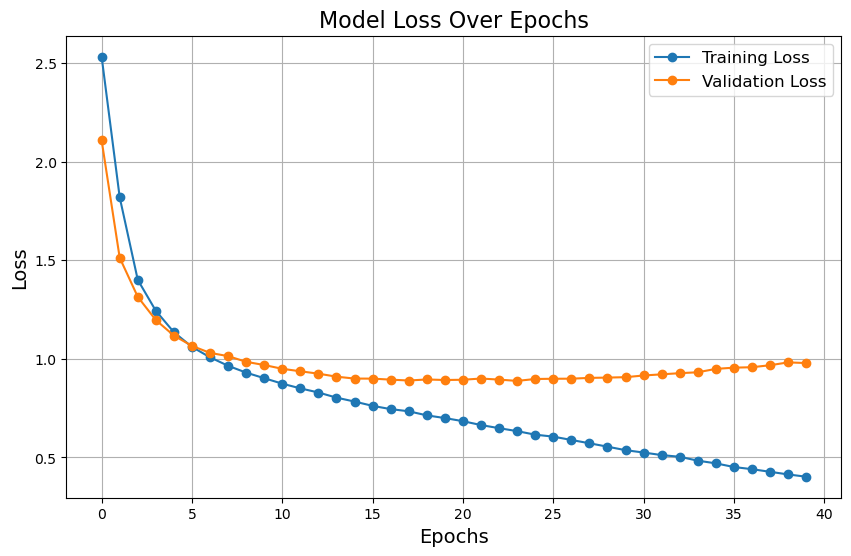

In [12]:
plot_loss(history)

# Choose Optimal Epochs 

In [15]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, 
                    output_dim=embedding_dim, 
                    weights=[embedding_matrix], 
                    input_length=max_len, 
                    trainable=False))

model.add(Dropout(rate=0.2))

model.add(GRU(units=224))

model.add(Dropout(rate=0.2))

model.add(Dense(24, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001, beta_1=0.999),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
history = model.fit(X_train_pad, y_train_lab, epochs=30, batch_size=256, validation_data=(X_test_pad, y_test_lab))

Epoch 1/30
83/83 [==============================] - 2s 20ms/step - loss: 2.5565 - accuracy: 0.2823 - val_loss: 2.1488 - val_accuracy: 0.3794
Epoch 2/30
83/83 [==============================] - 1s 17ms/step - loss: 1.8307 - accuracy: 0.4913 - val_loss: 1.5311 - val_accuracy: 0.5733
Epoch 3/30
83/83 [==============================] - 1s 18ms/step - loss: 1.4061 - accuracy: 0.6072 - val_loss: 1.3106 - val_accuracy: 0.6403
Epoch 4/30
83/83 [==============================] - 1s 17ms/step - loss: 1.2489 - accuracy: 0.6465 - val_loss: 1.2069 - val_accuracy: 0.6548
Epoch 5/30
83/83 [==============================] - 1s 17ms/step - loss: 1.1550 - accuracy: 0.6684 - val_loss: 1.1323 - val_accuracy: 0.6745
Epoch 6/30
83/83 [==============================] - 1s 17ms/step - loss: 1.0728 - accuracy: 0.6863 - val_loss: 1.0675 - val_accuracy: 0.6863
Epoch 7/30
83/83 [==============================] - 1s 17ms/step - loss: 1.0224 - accuracy: 0.6983 - val_loss: 1.0370 - val_accuracy: 0.6916
Epoch 8/30
83

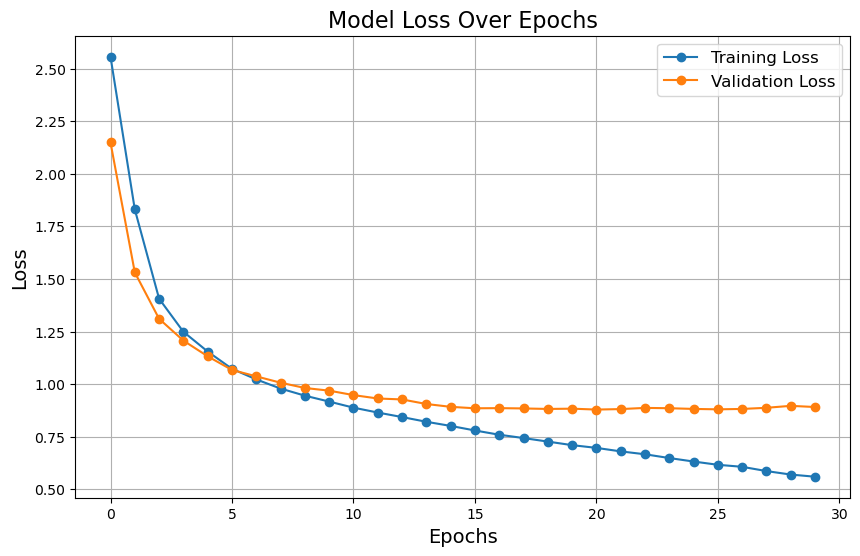

In [17]:
plot_loss(history)

In [21]:
y_pred = model.predict(X_test_pad)
    
y_pred = np.argmax(y_pred, axis=1)

p,r,f,s = precision_recall_fscore_support(y_test_lab, y_pred)
acc = accuracy_score(y_test_lab, y_pred)

165/165 [==============================] - 1s 5ms/step


In [22]:
results = pd.DataFrame({'Dominance':y_test.cat.categories,
                       'Precision':p,
                       'Recall':r, 
                       'F1': f, 
                       "Support": s})

macro_scores = results.loc[:, ["Precision", "Recall", "F1"]].agg('mean')

In [23]:
display(results)
display(macro_scores)
print("Overall Accuracy: ", acc)

,Dominance,Precision,Recall,F1,Support
0,Agriculture,0.730769,0.575758,0.644068,33
1,City/Town Character,0.762319,0.679587,0.718579,387
2,Economy and Employment,0.666667,0.636364,0.651163,132
3,Education,0.700000,0.622222,0.658824,45
4,Environment and Resources,0.725000,0.710784,0.717822,204
5,Govenment,0.657658,0.686520,0.671779,319
6,Growth and Development,0.704128,0.736211,0.719812,417
7,Health and Healthcare,0.818182,0.720000,0.765957,50
8,Housing,0.685841,0.714286,0.699774,217
9,Local Opportunities,0.638191,0.693989,0.664921,183


Precision    0.729071
Recall       0.704935
F1           0.715041
dtype: float64

Overall Accuracy:  0.7388909988606153


Text(98.2222222222222, 0.5, 'predicted label')

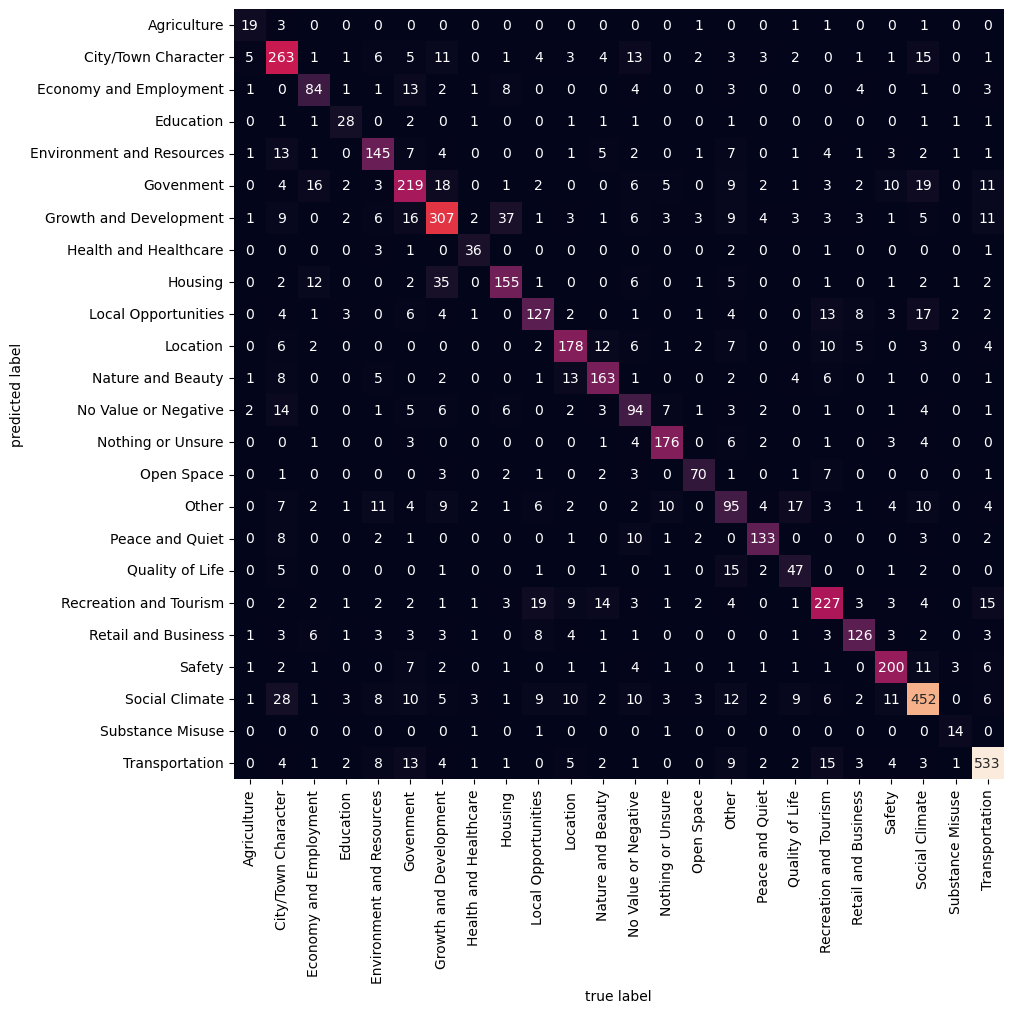

In [24]:
plt.figure(figsize=(10, 10))
mat = confusion_matrix(y_test_lab, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=y_test.cat.categories, yticklabels=y_test.cat.categories)
plt.xlabel('true label')
plt.ylabel('predicted label')

In [25]:
results.sort_values('F1', ascending=False)

,Dominance,Precision,Recall,F1,Support
23,Transportation,0.868078,0.875205,0.871627,609
13,Nothing or Unsure,0.875622,0.838095,0.856448,210
16,Peace and Quiet,0.815951,0.847134,0.831250,157
20,Safety,0.816327,0.800000,0.808081,250
21,Social Climate,0.757119,0.805704,0.780656,561
11,Nature and Beauty,0.783654,0.765258,0.774347,213
14,Open Space,0.760870,0.786517,0.773481,89
7,Health and Healthcare,0.818182,0.720000,0.765957,50
19,Retail and Business,0.728324,0.792453,0.759036,159
10,Location,0.747899,0.757447,0.752643,235


In [40]:
wrong_answers = pd.DataFrame({'text': X_test, 'y_pred':label_encoder.inverse_transform(y_pred), 'y_true':y_test})
wrong_answers = wrong_answers.loc[wrong_answers.y_pred != wrong_answers.y_true, :]

In [42]:
wrong_answers.to_csv("wrong_answers.csv")